Refer to this code to implement readinf tfrecords: https://www.youtube.com/watch?v=oxrcZ9uUblI


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_path = '"../Tfdata/train.record"'  # address to save the hdf5 file

with tf.Session() as sess:
    feature = {'image_height':   tf.FixedLenFeature([], tf.int64),
               'image_width':    tf.FixedLenFeature([], tf.int64),
               'image_depth':    tf.FixedLenFeature([], tf.int64),
               'image_filename': tf.FixedLenFeature([], tf.string),
               'xmin':           tf.FixedLenFeature([], tf.float32),
               'xmax':           tf.FixedLenFeature([], tf.float32),
               'ymin':           tf.FixedLenFeature([], tf.float32),
               'ymax':           tf.FixedLenFeature([], tf.float32),
               'classes':        tf.FixedLenFeature([], tf.string),
               'label':          tf.FixedLenFeature([], tf.int64),
               'difficult':      tf.FixedLenFeature([], tf.int64),
               #'truncated':      tf.FixedLenFeature([], tf.int64),
               'view':           tf.FixedLenFeature([], tf.string),
               'image':          tf.FixedLenFeature([], tf.string)
              }

    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)

    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)

    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)

    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['image'],  tf.float32)
    
    label = tf.cast(features['label'], tf.int32)

        
    #depth = tf.decode_raw(features['image_depth'], tf.int32)
    #width = tf.decode_raw(features['image_width'], tf.int32)
    #height = tf.decode_raw(features['image_height'], tf.int32)
    
    depth = tf.cast(features['image_depth'], tf.int32)
    width = tf.cast(features['image_width'], tf.int32)
    height = tf.cast(features['image_height'], tf.int32)

    #print(depth,width,height)

    # Cast label data into int32
    #label = tf.decode_raw(features['label'], string)

    # Reshape image data into the original shape
    image = tf.reshape(image, [250, 250, 3])
    #plt.imshow(image,cmap='gray')
    #plt.show()
    # Any preprocessing here ...
    #print(features['label'].shape)    
    # Creates batches by randomly shuffling tensors
    images, labels = tf.train.shuffle_batch([image, label], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
    
    
    
    #init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    #sess.run(init_op)
    
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    
    
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(1):
        img, lbl = sess.run([images, labels])
        img = img.astype(np.uint8)
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.imshow(img[j, ...])
            plt.title('cat' if lbl[j] == 0 else 'dog')
        plt.show()
    # Stop the threads
    coord.request_stop()

    # Wait for threads to stop
    coord.join(threads)
    sess.close()
    
    
    

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.NotFoundError'>, "../Tfdata/train.record"; No such file or directory
	 [[Node: ReaderReadV2 = ReaderReadV2[_device="/job:localhost/replica:0/task:0/device:CPU:0"](TFRecordReaderV2, input_producer)]]


OutOfRangeError: RandomShuffleQueue '_8_shuffle_batch_1/random_shuffle_queue' is closed and has insufficient elements (requested 10, current size 0)
	 [[Node: shuffle_batch_1 = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_INT32], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_1/random_shuffle_queue, shuffle_batch_1/n)]]

Caused by op u'shuffle_batch_1', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mohammad/Tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-02bdae478e5b>", line 60, in <module>
    images, labels = tf.train.shuffle_batch([image, label], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/training/input.py", line 1300, in shuffle_batch
    name=name)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/training/input.py", line 846, in _shuffle_batch
    dequeued = queue.dequeue_many(batch_size, name=name)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/ops/data_flow_ops.py", line 483, in dequeue_many
    self._queue_ref, n=n, component_types=self._dtypes, name=name)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_data_flow_ops.py", line 3480, in queue_dequeue_many_v2
    component_types=component_types, timeout_ms=timeout_ms, name=name)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): RandomShuffleQueue '_8_shuffle_batch_1/random_shuffle_queue' is closed and has insufficient elements (requested 10, current size 0)
	 [[Node: shuffle_batch_1 = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_INT32], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_1/random_shuffle_queue, shuffle_batch_1/n)]]


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_path = '"../Tfdata/mytest.record"'  # address to save the hdf5 file

with tf.Session() as sess:
    feature = {'image_height': tf.FixedLenFeature([], tf.int64),
               'image_width': tf.FixedLenFeature([], tf.int64),
               'image_filename': tf.FixedLenFeature([], tf.string),
               'xmin': tf.FixedLenFeature([], tf.float32),
               'xmax': tf.FixedLenFeature([], tf.float32),
               'ymin': tf.FixedLenFeature([], tf.float32),
               'ymax': tf.FixedLenFeature([], tf.float32),
               'classes': tf.FixedLenFeature([], tf.string),
               'label': tf.FixedLenFeature([], tf.int64),
               'difficult': tf.FixedLenFeature([], tf.int64),
               'truncated': tf.FixedLenFeature([], tf.int64),
               'view': tf.FixedLenFeature([], tf.string),
               'image': tf.FixedLenFeature([], tf.string)
              }

    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)

    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)

    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)

    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['label'], tf.int32)

    # Reshape image data into the original shape
    image = tf.reshape(image, [224, 224, 3])
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors
    images, labels = tf.train.shuffle_batch([image, label], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
    
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(5):
        img, lbl = sess.run([images, labels])
        img = img.astype(np.uint8)
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.imshow(img[j, ...])
            plt.title('cat' if lbl[j] == 0 else 'dog')
        plt.show()
    # Stop the threads
    coord.request_stop()

    # Wait for threads to stop
    coord.join(threads)
    sess.close()

(['2011_006148.jpg'], [375L], [3L])


/home/mohammad/Tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


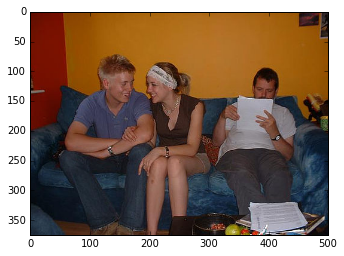

(['2012_000690.jpg'], [375L], [3L])


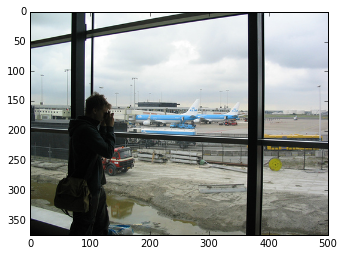

(['2009_003936.jpg'], [375L], [3L])


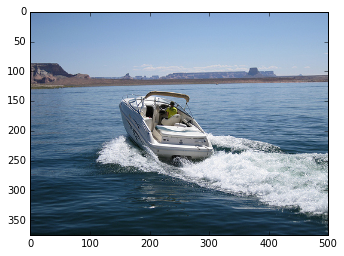

(['2010_001333.jpg'], [375L], [3L])


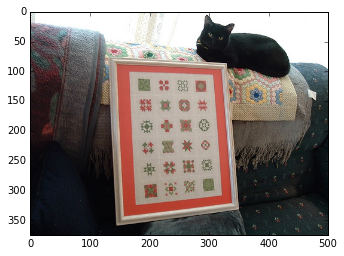

(['2010_006582.jpg'], [500L], [3L])


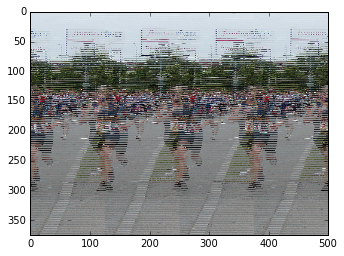

(['2011_004461.jpg'], [375L], [3L])


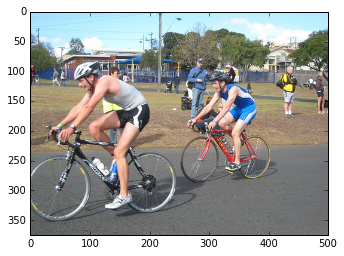

(['2007_003169.jpg'], [375L], [500L])


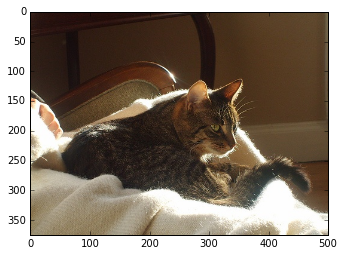

(['2011_002981.jpg'], [375L], [3L])


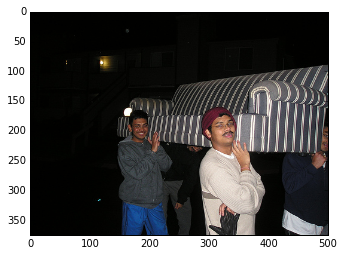

(['2008_003970.jpg'], [375L], [500L])


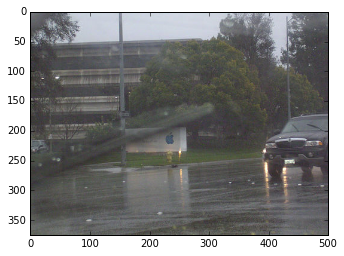

(['2011_000572.jpg'], [375L], [3L])


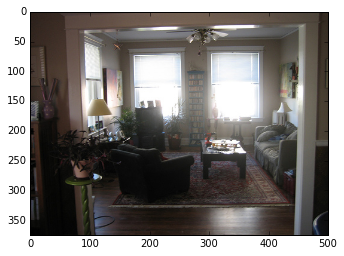

(['2008_004716.jpg'], [333L], [500L])


ValueError: cannot reshape array of size 499500 into shape (375,500,3)

In [81]:
reconstructed_images = []

record_iterator = tf.python_io.tf_record_iterator(path="../Tfdata/old/train.record")

for string_record in record_iterator:
    
    example = tf.train.Example()
        
    example.ParseFromString(string_record)
            
    height = (example.features.feature['image_height'].int64_list.value)
    
    width = (example.features.feature['image_width'].int64_list.value)
    
    image_filename = (example.features.feature['image_filename'].bytes_list.value)
    
    xmin = (example.features.feature['xmin'].float_list.value)
    
    xmax = (example.features.feature['xmax'].float_list.value)
    
    ymin = (example.features.feature['ymin'].float_list.value)

    ymax = (example.features.feature['ymax'].float_list.value)
    
    classes = (example.features.feature['classes'].bytes_list.value)
    
    labels = (example.features.feature['label'].int64_list.value)
    
    difficult = (example.features.feature['difficult'].int64_list.value)
    
    truncated = (example.features.feature['truncated'].int64_list.value)

    view = (example.features.feature['view'].bytes_list.value)
        
    img = (example.features.feature['image'].bytes_list.value)
    
    print(image_filename,height,width)
    img_1d = np.fromstring(''.join(img), dtype=np.uint8)
    reconstructed_img = img_1d.reshape((375,500 , 3))
        
    plt.imshow(reconstructed_img,cmap='gray')
    plt.show()
    